**1. Installing and importing library selenium**

In [2]:
#pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
        
import time

**2. Select Comfort Method. 0 - PMV, 1 - Adaptive**

In [4]:
driver = webdriver.Chrome()
# driver = webdriver.Safari()

url = "https://comfort.cbe.berkeley.edu"
driver.get(url)

dropdown = Select(driver.find_element(By.ID,"model-type"))
dropdown.select_by_index(0)

print(driver.title)

selected_method = dropdown.first_selected_option
selected_text = selected_method.text
print(selected_text)
time.sleep(0)

driver.close()
driver.quit()

CBE Thermal Comfort Tool for ASHRAE-55
PMV method


**3. Based on selected ASHRAE comfort standard input values and get comfort results**

In [6]:

def comfort_check(selected_text, ta=25, vel=0.3, rh=50, met=1, clo=0.7, trm=30):
    '''
    This function takes input values based on the selected comfort method:
    - Index 0: PMV method
    - Index 1: Adaptive method
    
    It takes indoor temperature (ta), air speed (vel), relative humidity (rh),
    metabolic rate (met), clothing (clo), and outdoor temperature (trm).
    First five inputs are for PMV method; ta and trm are for the adaptive method.
    '''
    
    url = "https://comfort.cbe.berkeley.edu"
    
    driver = webdriver.Chrome()
    # driver = webdriver.Safari()
    driver.get(url)
    
    try:
        if selected_text == 'PMV method':
            # Set the operative temperature
            l = driver.find_element(By.ID, "ta")
            l.send_keys(Keys.COMMAND + "a")
            l.send_keys(Keys.BACKSPACE)  
            l.send_keys(ta)
            
            # Set the air speed
            l = driver.find_element(By.ID, "vel")
            l.send_keys(Keys.COMMAND + "a")
            l.send_keys(Keys.BACKSPACE)  
            l.send_keys(vel)
            
            # Set the relative humidity
            l = driver.find_element(By.ID, "rh")
            l.send_keys(Keys.COMMAND + "a")
            l.send_keys(Keys.BACKSPACE)  
            l.send_keys(rh)
    
            # Set the metabolic rate
            l = driver.find_element(By.ID, "met")
            l.send_keys(Keys.COMMAND + "a")
            l.send_keys(Keys.BACKSPACE)  
            l.send_keys(met)
            
            # Set the clothing
            l = driver.find_element(By.ID, "clo")
            l.send_keys(Keys.COMMAND + "a")
            l.send_keys(Keys.BACKSPACE)  
            l.send_keys(clo)
            time.sleep(1)
            

            # Output results
            message_output1 = driver.find_element(By.ID, "output-b")
            message_text1 = message_output1.text
            print(message_text1) #Compliance
            
            message_output2 = driver.find_element(By.ID, "pmv-res")
            message_text2 = message_output2.text
            print('PMV: '+message_text2) # PMV value
            
            message_output3 = driver.find_element(By.ID, "sensation")
            message_text3 = message_output3.text
            print('Sensetion: '+ message_text3) # Sensation

            
            # Chart Display
            chart_element = driver.find_element(By.ID, 'chart-div')
            chart_element.screenshot('chart.png')
            driver.quit()

            # Load and display the chart image
            img = mpimg.imread('chart.png')
            plt.imshow(img)
            plt.axis('off')  # Hide the axes
            plt.show()
            
    
        else:  # Adaptive method
            dropdown = Select(driver.find_element(By.ID,"model-type"))
            dropdown.select_by_index(1)
            
            # Set the operative temperature
            l = driver.find_element(By.ID, "ta")
            l.send_keys(Keys.COMMAND + "a")
            l.send_keys(Keys.BACKSPACE)  
            l.send_keys(ta)
    
            # Set the outdoor temperature
            l = driver.find_element(By.ID, "trm")
            l.send_keys(Keys.COMMAND + "a")
            l.send_keys(Keys.BACKSPACE)  
            l.send_keys(trm)
            time.sleep(1)
            

            # Output results
            message_output1 = driver.find_element(By.ID, "output-b")
            message_text1 = message_output1.text
            print(message_text1)  # Compliance
            
            message_output2 = driver.find_element(By.ID, "limits80")
            message_text2 = message_output2.text
            print('80% acceptability limits: '+ message_text2) 
    
            message_output3 = driver.find_element(By.ID, "limits90")
            message_text3 = message_output3.text
            print('90% acceptability limits: ' + message_text3)
    
            
            # Chart Display
            chart_element = driver.find_element(By.ID, 'chart-div-adaptive')
            chart_element.screenshot('chart.png')
            driver.quit()

            # Load and display the chart image
            img = mpimg.imread('chart.png')
            plt.imshow(img)
            plt.axis('off')  # Hide the axes
            plt.show()
        
        
    finally:
        # Close the driver
        time.sleep(1)
        driver.quit()


✘   Does not comply with ASHRAE Standard 55-2023
PMV: 1.32
Sensetion: Slightly Warm


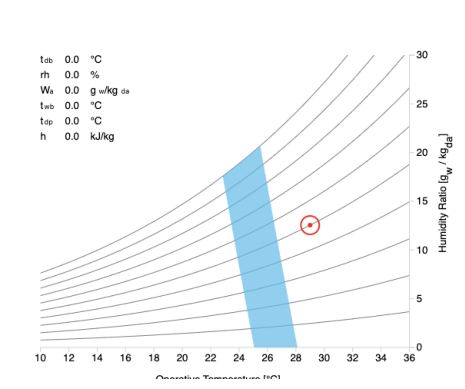

In [7]:
## Input values for the comfort test
ta = 29
vel = 0.05
rh = 50
met = 1
clo = 0.5
trm = 30

# Check comfort based on user input parameters
comfort_check(selected_text, ta, vel, rh, met, clo, trm)

In [8]:
driver.quit()